In [2]:
import pandas as pd
unlabeled_final = pd.read_csv('unlabled_data_final_version.csv',sep=',',encoding = "ISO-8859-1")
phish_tank_final = pd.read_csv('phish_tank_final_version.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('confirmed_CovidURL_final_version.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('Confirmed_whitelist_final_version.csv',sep=',',encoding = "ISO-8859-1")

In [37]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain
0,http://coronavirusemploymentservices.com,0,0,0,0,6,0,0.050000,0,2,0,14,0,200,0,0.0,0.0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,0,3,0,503,0,0.0,0.0,0,0
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,0,5,0,503,0,0.0,0.0,0,0
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,0,8,1,404,0,0.0,0.0,0,0
4,http://coronavirusend.com,0,0,0,0,5,0,0.080000,0,2,0,3,0,200,0,0.0,0.0,0,1


In [3]:
break_num = int(len(unlabeled_final['Unified_url'])/2)
print(break_num)

114744


In [4]:
import subprocess
import re
from tqdm import tqdm
def dig_wildCard_domain(url_list):
    wildcard_subdomain = []
    getattr(tqdm, '_instances', {}).clear()
    for url in tqdm(url_list):
#         print(url)
        hostname = url
        pattern = "https://|http://|www.|https://www.|http://www."
        pre_pattern_match = re.search(pattern, hostname)
        if pre_pattern_match:
            hostname = hostname[pre_pattern_match.end():]
            post_pattern_match = re.search("/", hostname)
            if post_pattern_match:
                hostname = hostname[:post_pattern_match.start()]
            char = hostname
        if char[:3] == 'www':
            position = [m.start() for m in re.finditer('[.]',url)]
            char = url[position[0]:][1:]
            search_char = '*' + '.' + char
#             print(search_char)
            out = subprocess.Popen(['dig', '+short', search_char], 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            if len(stdout)!= 0:
                wildcard_subdomain.append(1)
            else:
                wildcard_subdomain.append(0)
        else:   
            search_char = '*' + '.' + char
#             print(search_char)
            out = subprocess.Popen(['dig', '+short', search_char], 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
#             print(stdout)
            if len(stdout)!= 0:
                wildcard_subdomain.append(1)
            else:
                wildcard_subdomain.append(0)
    return wildcard_subdomain

In [5]:
wildcard_subdomain_unlabeled = dig_wildCard_domain(unlabeled_final['Unified_url'][:break_num])

100%|██████████| 114744/114744 [8:34:49<00:00,  3.71it/s]   


In [8]:
wildcard_subdomain_unlabeled2 = []

# open file and read the content in a list
with open('listfile.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        wildcard_subdomain_unlabeled2.append(currentPlace)

In [10]:
wildcard_subdomain_unlabeled_final = wildcard_subdomain_unlabeled + wildcard_subdomain_unlabeled2

In [11]:
unlabeled_final['wildcard_subdomain'] = wildcard_subdomain_unlabeled_final

In [96]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,...,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,...,14,0,200,0,,0.0,0,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,...,3,0,503,0,,0.0,0,0,0,1
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,...,5,0,503,0,,0.0,0,0,0,1
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,...,8,1,404,0,,0.0,0,0,0,1
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,...,3,0,200,0,,0.0,0,1,0,0


In [13]:
wildcard_subdomain_phishtank = []

# open file and read the content in a list
with open('phishtank_wildcard.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        wildcard_subdomain_phishtank.append(currentPlace)

In [16]:
phish_tank_final['wildcard_subdomain'] = wildcard_subdomain_phishtank

In [14]:
wildcard_subdomain_white = []

# open file and read the content in a list
with open('white_wildcard.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        wildcard_subdomain_white.append(currentPlace)

In [17]:
white_list_final['wildcard_subdomain'] = wildcard_subdomain_white

In [15]:
wildcard_subdomain_maclious = []

# open file and read the content in a list
with open('maclious_wildcard.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        wildcard_subdomain_maclious.append(currentPlace)

In [18]:
confirmed_maclious_final['wildcard_subdomain'] = wildcard_subdomain_maclious

In [22]:
status_code_unlabel = []
status_code_phishtank = []
status_code_white = []
status_code_maclious = []
# open file and read the content in a list
with open('temp1.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        status_code_unlabel.append(currentPlace)
with open('temp2.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        status_code_phishtank.append(currentPlace)
with open('temp3.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        status_code_white.append(currentPlace)
with open('temp4.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        status_code_maclious.append(currentPlace)

In [24]:
unlabeled_final['Status_code'] = status_code_unlabel
phish_tank_final['Status_code'] = status_code_phishtank
white_list_final['Status_code'] = status_code_white
confirmed_maclious_final['Status_code'] = status_code_maclious

In [93]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,...,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,...,14,0,200,0,NaN,0.0,0,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,...,3,0,503,0,NaN,0.0,0,0,0,1
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,...,5,0,503,0,NaN,0.0,0,0,0,1
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,...,8,1,404,0,NaN,0.0,0,0,0,1
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,...,3,0,200,0,NaN,0.0,0,1,0,0


In [26]:
unlabeled_final.to_csv('unlabled_data_final_version.csv',index=False,header=True)
phish_tank_final.to_csv('phish_tank_final_version.csv',index=False,header=True)
confirmed_maclious_final.to_csv('confirmed_CovidURL_final_version.csv',index=False,header=True)
white_list_final.to_csv('Confirmed_whitelist_final_version.csv',index=False,header=True)

In [35]:
def extract_feature_from_status(templist):
    blocked_list = []
    redirected_list = []
    Reachable_list = []
    for i in templist:
        i = int(i)
        if i < 300:
            Reachable_list.append(1)
        else:
            Reachable_list.append(0)
    for i in templist:
        i = int(i)
        if i > 200 and i < 400:
            redirected_list.append(1)
        else:
            redirected_list.append(0)
    for i in templist:
        i = int(i)
        if i > 400:
            blocked_list.append(1)
        else:
            blocked_list.append(0)
    return Reachable_list,redirected_list,blocked_list

Reachable_list_unlabeled, redirected_list_unlabeled, blocked_list_unlabeled =  extract_feature_from_status(unlabeled_final['Status_code'])

In [36]:
Reachable_list_phishtank, redirected_list_phishtank, blocked_list_phishtank =  extract_feature_from_status(phish_tank_final['Status_code'])
Reachable_list_mal, redirected_list_mal, blocked_list_mal =  extract_feature_from_status(confirmed_maclious_final['Status_code'])
Reachable_list_whi, redirected_list_whi, blocked_list_whi=  extract_feature_from_status(white_list_final['Status_code'])

In [38]:
unlabeled_final['Reachable_URL'],unlabeled_final['Redirect_URL'],unlabeled_final['Blocked_url'] = Reachable_list_unlabeled, redirected_list_unlabeled, blocked_list_unlabeled

In [39]:
phish_tank_final['Reachable_URL'],phish_tank_final['Redirect_URL'],phish_tank_final['Blocked_url'] =  Reachable_list_phishtank, redirected_list_phishtank, blocked_list_phishtank
confirmed_maclious_final['Reachable_URL'],confirmed_maclious_final['Redirect_URL'],confirmed_maclious_final['Blocked_url'] = Reachable_list_mal, redirected_list_mal, blocked_list_mal
white_list_final['Reachable_URL'],white_list_final['Redirect_URL'],white_list_final['Blocked_url'] = Reachable_list_whi, redirected_list_whi, blocked_list_whi



In [47]:
white_list_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Unified_url                                98 non-null object
Reachable_URL                              98 non-null int64
Way_back_archived                          98 non-null int64
Freenom_top_level_domain                   98 non-null int64
Previous_malicious_top_level_domain_TLD    98 non-null int64
Name_length                                98 non-null int64
Wrong_spell_List                           98 non-null int64
word_dic                                   98 non-null float64
Special_mark                               98 non-null int64
sub_domain                                 98 non-null int64
Contain_IP_Adress                          98 non-null int64
levenshtein_distance                       98 non-null int64
Alexa_rank                                 98 non-null int64
Status_code                                98 non-null int64
Shortening service                      

In [46]:
unlabeled_final['Status_code'] = unlabeled_final['Status_code'].astype(int)
phish_tank_final['Status_code'] = phish_tank_final['Status_code'].astype(int)
confirmed_maclious_final['Status_code'] = confirmed_maclious_final['Status_code'].astype(int)
white_list_final['Status_code'] = white_list_final['Status_code'].astype(int)

In [49]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,...,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,...,14,0,200,0,0.0,0.0,0,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,...,3,0,503,0,0.0,0.0,0,0,0,1
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,...,5,0,503,0,0.0,0.0,0,0,0,1
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,...,8,1,404,0,0.0,0.0,0,0,0,1
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,...,3,0,200,0,0.0,0.0,0,1,0,0


In [50]:
unlabeled_final['wildcard_subdomain'] = unlabeled_final['wildcard_subdomain'].astype(int)
phish_tank_final['wildcard_subdomain'] = phish_tank_final['wildcard_subdomain'].astype(int)
confirmed_maclious_final['wildcard_subdomain'] = confirmed_maclious_final['wildcard_subdomain'].astype(int)
white_list_final['wildcard_subdomain'] = white_list_final['wildcard_subdomain'].astype(int)


In [51]:
white_list_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Unified_url                                98 non-null object
Reachable_URL                              98 non-null int64
Way_back_archived                          98 non-null int64
Freenom_top_level_domain                   98 non-null int64
Previous_malicious_top_level_domain_TLD    98 non-null int64
Name_length                                98 non-null int64
Wrong_spell_List                           98 non-null int64
word_dic                                   98 non-null float64
Special_mark                               98 non-null int64
sub_domain                                 98 non-null int64
Contain_IP_Adress                          98 non-null int64
levenshtein_distance                       98 non-null int64
Alexa_rank                                 98 non-null int64
Status_code                                98 non-null int64
Shortening service                      

In [52]:
phish_status_code_class_final = phish_tank_final.groupby(by=['start_date'])
temp_final1 = phish_status_code_class_final.size().reset_index()
temp_final1

,start_date,0
0,0,47294
1,1985,1
2,1986,1
3,1987,2
4,1990,1
5,1991,1
6,1992,3
7,1993,2
8,1994,31
9,1995,375


In [53]:
phish_status_code_class_final = phish_tank_final.groupby(by=['end_date'])
temp_final1 = phish_status_code_class_final.size().reset_index()
temp_final1

,end_date,0
0,0,47362
1,2020,11003
2,2021,29011
3,2022,8812
4,2023,1178
5,2024,388
6,2025,171
7,2026,103
8,2027,65
9,2028,84


In [54]:
phish_status_code_class_final = unlabeled_final.groupby(by=['end_date'])
temp_final1 = phish_status_code_class_final.size().reset_index()
temp_final1

,end_date,0
0,0.0,140802
1,2020.0,4195
2,2021.0,62757
3,2022.0,16247
4,2023.0,718
5,2024.0,2285
6,2025.0,579
7,2026.0,612
8,2027.0,336
9,2028.0,505


In [55]:
phish_status_code_class_final = unlabeled_final.groupby(by=['start_date'])
temp_final1 = phish_status_code_class_final.size().reset_index()
temp_final1

,start_date,0
0,0.0,140794
1,1985.0,182
2,1986.0,161
3,1987.0,131
4,1988.0,75
5,1989.0,43
6,1990.0,21
7,1991.0,53
8,1992.0,91
9,1993.0,21


In [58]:
import seaborn as sb
corr = unlabeled_final.corr()
map = corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [59]:
map

,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
Reachable_URL,1,0.13,-0.03,-0.025,-0.21,0.0026,0.0069,-0.037,-0.35,-0.12,-0.22,-0.26,-0.93,0.035,0.33,0.33,0.2,-0.18,-0.052,-0.99
Way_back_archived,0.13,1,-0.011,-0.0077,-0.09,-0.0022,0.075,-0.0051,-0.089,-0.037,-0.096,0.0026,-0.12,-0.0047,0.046,0.046,-0.0056,-0.12,0.017,-0.13
Freenom_top_level_domain,-0.03,-0.011,1,0.7,0.0017,-0.00099,0.031,0.029,-0.042,-0.0089,0.0032,-0.045,0.042,-0.013,-0.05,-0.05,-0.024,-0.024,-0.00035,0.03
Previous_malicious_top_level_domain_TLD,-0.025,-0.0077,0.7,1,-0.03,0.0048,0.066,0.011,-0.06,-0.014,-0.017,-0.057,0.043,-0.018,-0.071,-0.071,-0.034,-0.041,0.001,0.025
Name_length,-0.21,-0.09,0.0017,-0.03,1,-0.0053,-0.62,0.23,0.68,0.23,0.8,0.4,0.19,-0.0013,-0.043,-0.043,0.24,0.32,0.0017,0.21
Wrong_spell_List,0.0026,-0.0022,-0.00099,0.0048,-0.0053,1,0.035,-0.00099,-0.014,-0.0027,-0.014,-0.011,-0.001,-0.0033,-0.0023,-0.0023,-0.0052,-0.0087,-0.00095,-0.0024
Longest_word_ratio,0.0069,0.075,0.031,0.066,-0.62,0.035,1,-0.19,-0.48,-0.14,-0.76,-0.22,-0.016,-0.039,-0.16,-0.16,-0.32,-0.19,-0.0071,0.00063
Special_mark,-0.037,-0.0051,0.029,0.011,0.23,-0.00099,-0.19,1,0.063,-0.048,0.21,0.071,0.033,-0.0098,-0.022,-0.021,0.056,0.12,0.013,0.036
sub_domain,-0.35,-0.089,-0.042,-0.06,0.68,-0.014,-0.48,0.063,1,0.37,0.7,0.59,0.27,-0.028,-0.26,-0.26,0.15,0.48,-0.0069,0.35
Contain_Weried_number_combination,-0.12,-0.037,-0.0089,-0.014,0.23,-0.0027,-0.14,-0.048,0.37,1,0.24,-0.087,0.18,-0.025,-0.085,-0.084,-0.028,-0.11,-0.0087,0.12


In [1]:
import pandas as pd
unlabeled_final = pd.read_csv('unlabled_data_final_version.csv',sep=',',encoding = "ISO-8859-1")
phish_tank_final = pd.read_csv('phish_tank_final_version.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('confirmed_CovidURL_final_version.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('Confirmed_whitelist_final_version.csv',sep=',',encoding = "ISO-8859-1")

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,...,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,...,14,0,200,0,2015,2021,2190,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,...,3,0,503,0,2015,2021,2190,0,0,1
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,...,5,0,503,0,2015,2021,2190,0,0,1
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,...,8,1,404,0,2015,2021,2190,0,0,1
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,...,3,0,200,0,2014,2021,2555,1,0,0


In [2]:
!pip install impyute

In [40]:
confirmed_maclious_final = confirmed_maclious_final.rename(columns = {'Contain_IP_Adress':'Contain_Weried_number_combination'})
white_list_final = white_list_final.rename(columns = {'Contain_IP_Adress':'Contain_Weried_number_combination'})


confirmed_maclious_final = confirmed_maclious_final.rename(columns = {'word_dic':'Longest_word_ratio'})
white_list_final = white_list_final.rename(columns = {'word_dic':'Longest_word_ratio'})

confirmed_maclious_final = confirmed_maclious_final.rename(columns = {'Shortening service':'Shortening_service'})
white_list_final = white_list_final.rename(columns = {'Shortening service':'Shortening_service'})


In [51]:
phish_tank_final['start_date'] = phish_tank_final['start_date'].replace(0,np.nan)
confirmed_maclious_final['start_date'] = confirmed_maclious_final['start_date'].replace(0,np.nan)
white_list_final['start_date'] = white_list_final['start_date'].replace(0,np.nan)
phish_tank_final['end_date'] = phish_tank_final['end_date'].replace(0,np.nan)
confirmed_maclious_final['end_date'] = confirmed_maclious_final['end_date'].replace(0,np.nan)
white_list_final['end_date'] = white_list_final['end_date'].replace(0,np.nan)

In [30]:
white_list_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Unified_url                                98 non-null object
Reachable_URL                              98 non-null int64
Way_back_archived                          98 non-null int64
Freenom_top_level_domain                   98 non-null int64
Previous_malicious_top_level_domain_TLD    98 non-null int64
Name_length                                98 non-null int64
Wrong_spell_List                           98 non-null int64
Longest_word_ratio                         98 non-null float64
Special_mark                               98 non-null int64
sub_domain                                 98 non-null int64
Contain_Weried_number_combination          98 non-null int64
levenshtein_distance                       98 non-null int64
Alexa_rank                                 98 non-null int64
Status_code                                98 non-null int64
Shortening_service                      

In [53]:
Data_all = unlabeled_final.append(phish_tank_final, ignore_index=True)
Data_all = Data_all.append(confirmed_maclious_final, ignore_index=True)
Data_all = Data_all.append(white_list_final, ignore_index=True)

In [54]:
Data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328232 entries, 0 to 328231
Data columns (total 21 columns):
Unified_url                                328232 non-null object
Reachable_URL                              328232 non-null int64
Way_back_archived                          328232 non-null int64
Freenom_top_level_domain                   328232 non-null int64
Previous_malicious_top_level_domain_TLD    328232 non-null int64
Name_length                                328232 non-null int64
Wrong_spell_List                           328232 non-null int64
Longest_word_ratio                         328232 non-null float64
Special_mark                               328232 non-null int64
sub_domain                                 328232 non-null int64
Contain_Weried_number_combination          328232 non-null int64
levenshtein_distance                       328232 non-null int64
Alexa_rank                                 328232 non-null int64
Status_code                              

In [55]:
import datawig
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Reachable_URL', 'Way_back_archived', 'Freenom_top_level_domain',
       'Previous_malicious_top_level_domain_TLD', 'Name_length',
       'Wrong_spell_List', 'Longest_word_ratio', 'Special_mark', 'sub_domain',
       'Contain_Weried_number_combination', 'levenshtein_distance',
       'Alexa_rank', 'Status_code', 'Shortening_service',
       'end_date', 'site_age(days)', 'wildcard_subdomain', 'Redirect_URL',
       'Blocked_url'], # column(s) containing information about the column we want to impute
    output_column= 'start_date', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=Data_all, num_epochs=50)

#Impute missing values and return original dataframe with predictions


2020-07-09 18:20:30,937 [INFO]  
========== start: fit model
2020-07-09 18:20:30,938 [WARNING]  Already bound, ignoring bind()
2020-07-09 18:20:37,865 [INFO]  Epoch[0] Batch [0-9232]	Speed: 21335.43 samples/sec	cross-entropy=1.317778	start_date-accuracy=0.000000
2020-07-09 18:20:44,983 [INFO]  Epoch[0] Train-cross-entropy=0.798811
2020-07-09 18:20:44,985 [INFO]  Epoch[0] Train-start_date-accuracy=0.000000
2020-07-09 18:20:44,986 [INFO]  Epoch[0] Time cost=14.045
2020-07-09 18:20:44,989 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-07-09 18:20:45,245 [INFO]  Epoch[0] Validation-cross-entropy=0.444576
2020-07-09 18:20:45,247 [INFO]  Epoch[0] Validation-start_date-accuracy=0.000000
2020-07-09 18:20:52,682 [INFO]  Epoch[1] Batch [0-9232]	Speed: 19874.51 samples/sec	cross-entropy=0.279645	start_date-accuracy=0.000000
2020-07-09 18:20:59,801 [INFO]  Epoch[1] Train-cross-entropy=0.256146
2020-07-09 18:20:59,803 [INFO]  Epoch[1] Train-start_date-accuracy=0.000000
2020-07-0

In [56]:
#Initialize a SimpleImputer model
imputer2 = datawig.SimpleImputer(
    input_columns=['Reachable_URL', 'Way_back_archived', 'Freenom_top_level_domain',
       'Previous_malicious_top_level_domain_TLD', 'Name_length',
       'Wrong_spell_List', 'Longest_word_ratio', 'Special_mark', 'sub_domain',
       'Contain_Weried_number_combination', 'levenshtein_distance',
       'Alexa_rank', 'Status_code', 'Shortening_service',
       'start_date', 'site_age(days)', 'wildcard_subdomain', 'Redirect_URL',
       'Blocked_url'], # column(s) containing information about the column we want to impute
    output_column= 'end_date', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer2.fit(train_df=Data_all, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed2_unlabeled = imputer2.predict(unlabeled_final)

2020-07-09 18:23:23,319 [INFO]  
========== start: fit model
2020-07-09 18:23:23,321 [WARNING]  Already bound, ignoring bind()
2020-07-09 18:23:30,275 [INFO]  Epoch[0] Batch [0-9232]	Speed: 21250.83 samples/sec	cross-entropy=4.466711	end_date-accuracy=0.000000
2020-07-09 18:23:37,143 [INFO]  Epoch[0] Train-cross-entropy=2.381673
2020-07-09 18:23:37,144 [INFO]  Epoch[0] Train-end_date-accuracy=0.000000
2020-07-09 18:23:37,144 [INFO]  Epoch[0] Time cost=13.822
2020-07-09 18:23:37,148 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-07-09 18:23:37,391 [INFO]  Epoch[0] Validation-cross-entropy=0.389481
2020-07-09 18:23:37,392 [INFO]  Epoch[0] Validation-end_date-accuracy=0.000000
2020-07-09 18:23:44,325 [INFO]  Epoch[1] Batch [0-9232]	Speed: 21316.54 samples/sec	cross-entropy=0.219954	end_date-accuracy=0.000000
2020-07-09 18:23:51,353 [INFO]  Epoch[1] Train-cross-entropy=0.220115
2020-07-09 18:23:51,354 [INFO]  Epoch[1] Train-end_date-accuracy=0.000000
2020-07-09 18:23:51

In [57]:
imputed_unlabeled_start = imputer.predict(unlabeled_final)
imputed_phishtank_start = imputer.predict(phish_tank_final)
imputed_maclious_start = imputer.predict(confirmed_maclious_final)
imputed_white_start = imputer.predict(white_list_final)

In [58]:
imputed_unlabeled_end = imputer2.predict(unlabeled_final)
imputed_phishtank_end = imputer2.predict(phish_tank_final)
imputed_maclious_end = imputer2.predict(confirmed_maclious_final)
imputed_white_end = imputer2.predict(white_list_final)

In [63]:
def round_value(list_all):
    temp = []
    for i in list_all:
        i = round(i)
        temp.append(i)
    return temp

In [67]:
unlabeled_final['start_date'] = round_value(imputed_unlabeled_start['start_date_imputed'])
phish_tank_final['start_date'] = round_value(imputed_phishtank_start['start_date_imputed'])
confirmed_maclious_final['start_date'] = round_value(imputed_maclious_start['start_date_imputed'])
white_list_final['start_date'] = round_value(imputed_white_start['start_date_imputed'])

In [68]:
unlabeled_final['end_date'] = round_value(imputed_unlabeled_end['end_date_imputed'])
phish_tank_final['end_date'] = round_value(imputed_phishtank_end['end_date_imputed'])
confirmed_maclious_final['end_date'] = round_value(imputed_maclious_end['end_date_imputed'])
white_list_final['end_date'] = round_value(imputed_white_end['end_date_imputed'])

In [18]:
def Cal_period(start,end,periods):
    period_list = []
    for i in range(len(start)):
        if periods[i]!=0:
            period_list.append(periods[i])
        else:
            period = (end[i] - start[i]) * 365
            period_list.append(period)
    return period_list

In [10]:
Period_unlabeled = Cal_period(unlabeled_final['start_date'],unlabeled_final['end_date'],unlabeled_final['site_age(days)'])
Period_phishtank = Cal_period(phish_tank_final['start_date'],phish_tank_final['end_date'],phish_tank_final['site_age(days)'])



In [19]:
Period_white = Cal_period(white_list_final['start_date'],white_list_final['end_date'],white_list_final['site_age(days)'])

In [20]:
Period_malicous = Cal_period(confirmed_maclious_final['start_date'],confirmed_maclious_final['end_date'],confirmed_maclious_final['site_age(days)'])

In [24]:
unlabeled_final['site_age(days)'] = Period_unlabeled
phish_tank_final['site_age(days)'] = Period_phishtank
confirmed_maclious_final['site_age(days)'] = Period_malicous
white_list_final['site_age(days)'] = Period_white

In [25]:
white_list_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,...,levenshtein_distance,Alexa_rank,Status_code,Shortening_service,start_date,end_date,site_age(days),wildcard_subdomain,Redirect_URL,Blocked_url
0,https://akkure4covid.com,0,1,0,0,7,0,0.090909,0,1,...,5,0,503,0,2020,2021,365,0,0,1
1,https://api.contracovid.com.br,1,0,0,0,7,0,0.071429,0,3,...,10,0,200,0,2014,2021,2555,0,0,0
2,https://app.contracovid.com.br,1,0,0,0,7,0,0.071429,0,3,...,10,0,200,0,2014,2021,2555,0,0,0
3,https://auxilio.caixa.gov.br,1,1,0,0,8,0,0.076923,0,3,...,13,1,200,0,2015,2021,2190,0,0,0
4,https://bag-coronavirus.ch,1,1,0,0,4,0,0.083333,1,1,...,6,1,200,0,2015,2021,2190,0,0,0


In [88]:
unlabeled_final.to_csv('unlabled_data_final_version.csv',index=False,header=True)
phish_tank_final.to_csv('phish_tank_final_version.csv',index=False,header=True)
confirmed_maclious_final.to_csv('confirmed_CovidURL_final_version.csv',index=False,header=True)
white_list_final.to_csv('Confirmed_whitelist_final_version.csv',index=False,header=True)

In [95]:
from sklearn.svm import OneClassSVM
Train_data_phishtank = phish_tank_final.drop(columns=['Unified_url'])
clf = OneClassSVM(gamma='scale',verbose=True,kernel='sigmoid',degree=5).fit(Train_data_phishtank)

[LibSVM]

In [96]:
test_set = confirmed_maclious_final.drop(columns=['Unified_url'])
prediction = clf.predict(test_set)
print(prediction)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [97]:
test_set2 = white_list_final.drop(columns=['Unified_url'])
prediction2 = clf.predict(test_set2)
print(prediction2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


In [98]:
test_set3 = unlabeled_final.drop(columns=['Unified_url'])
prediction3 = clf.predict(test_set3)

In [2]:
import pandas as pd
unlabeled_final = pd.read_csv('unlabled_data_final_version.csv',sep=',',encoding = "ISO-8859-1")
phish_tank_final = pd.read_csv('phish_tank_final_version.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('confirmed_CovidURL_final_version.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('Confirmed_whitelist_final_version.csv',sep=',',encoding = "ISO-8859-1")

In [2]:

def count_pos(prediction):
    temp = 0
    for i in prediction:
        if i == 1:
            temp+=1
            
    return temp/len(prediction)


In [3]:
list1 =  list(range(3,11))
print(list1)

[3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
from tqdm import tqdm
from sklearn.svm import OneClassSVM
def Tran_and_text(Train_data_phishtank):
    unlabel_pos = []
    malicous_pos = []
    white_pos = []
    for iters in tqdm(range(3,11)):
        clf = OneClassSVM(gamma='scale',
                          verbose=False,kernel='poly',
                          degree=iters).fit(Train_data_phishtank)
        test_set1 = unlabeled_final.drop(columns=['Unified_url'])
        test_set2 = white_list_final.drop(columns=['Unified_url'])
        test_set3 = confirmed_maclious_final.drop(columns=['Unified_url'])
        prediction1 = clf.predict(test_set1)
        pos_rate1 = count_pos(prediction1)
        prediction2 = clf.predict(test_set2)
        pos_rate2 = count_pos(prediction2)
        prediction3 = clf.predict(test_set3)
        pos_rate3 = count_pos(prediction3)
        unlabel_pos.append(pos_rate1)
        white_pos.append(pos_rate2)
        malicous_pos.append(pos_rate3)
    return unlabel_pos, malicous_pos,white_pos
Train_data_phishtank = phish_tank_final.drop(columns=['Unified_url'])

In [5]:
unlabel_pos, malicous_pos,white_pos = Tran_and_text(Train_data_phishtank)

100%|██████████| 8/8 [1:22:12<00:00, 616.50s/it]


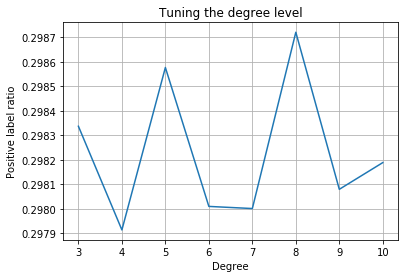

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = list(range(3,11))
s = unlabel_pos

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Degree', ylabel='Positive label ratio',
       title='Tuning the degree level')
ax.grid()


plt.show()



In [7]:
malicous_pos

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [8]:
white_pos

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [2]:
Data_all = unlabeled_final.append(phish_tank_final, ignore_index=True)
Data_all = Data_all.append(confirmed_maclious_final, ignore_index=True)
Data_all = Data_all.append(white_list_final, ignore_index=True)

In [3]:
Data_all = Data_all.drop(columns = ['Unified_url'])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
clustering = DBSCAN(eps=2, min_samples=30, 
                    metric='cosine', metric_params=None, algorithm='auto', 
                    leaf_size=30, p=None, n_jobs=None)
clustering.fit(Data_all)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
clustering2 = DBSCAN(eps=2, min_samples=30, 
                    metric='cosine', metric_params=None, algorithm='auto', 
                    leaf_size=30, p=None, n_jobs=None)
clustering.fit(Data_all)